In [51]:
import numpy as np
import pandas as pd
from IPython.display import Image, display
import random

data_directory = '../data/'

In [66]:
data.loc[data[206] == '7--Cheering/7_Cheering_Cheering_7_532.jpg']

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
1601,642.796997,231.664993,645.340225,239.788948,647.730701,247.958919,649.804981,256.214129,651.615552,264.532057,...,188,752,322,0,0,1,0,0,1,7--Cheering/7_Cheering_Cheering_7_532.jpg
3314,233.061996,139.264999,233.383074,146.494125,233.734896,153.721808,234.136955,160.946867,234.713232,168.159401,...,94,324,222,0,0,1,0,0,1,7--Cheering/7_Cheering_Cheering_7_532.jpg
7149,790.833984,168.792999,789.731159,176.915635,788.584639,185.032202,787.344214,193.134888,786.062486,201.231179,...,144,902,288,0,0,1,0,0,1,7--Cheering/7_Cheering_Cheering_7_532.jpg


In [64]:
import torch
data.iloc[2, 0: 98 * 2]
data.iloc[2, 98 * 2 : (98 * 2) + 4]

[data.iloc[2, 98 * 2 : (98 * 2) + 4].values.tolist()[:2],
data.iloc[2, 98 * 2 : (98 * 2) + 4].values.tolist()[2:]]
data.iloc[2, (98 * 2) + 4 : (98 * 2) + 4 + 6].values.tolist()
#data.iloc[2, 98 * 2 : (98 * 2) + 4]
torch.tensor(data.iloc[2, 0: 98 * 2].values.astype(np.float32))

tensor([249.1280, 175.4630, 249.3304, 188.4176, 249.3931, 201.3736, 249.5584,
        214.3281, 250.5306, 227.2436, 252.8776, 239.9770, 256.8897, 252.2856,
        262.2745, 264.0652, 268.7020, 275.3086, 276.3746, 285.7377, 285.2805,
        295.1374, 295.1319, 303.5450, 305.6632, 311.0867, 316.6716, 317.9149,
        328.3535, 323.4577, 341.0452, 325.9791, 353.9517, 326.2669, 364.4468,
        322.7513, 373.3308, 316.1035, 380.6341, 307.7355, 386.4006, 298.2255,
        392.3635, 288.8368, 398.9997, 279.9075, 404.5743, 270.2973, 408.8728,
        260.0379, 412.8586, 249.6505, 416.1284, 239.0245, 417.5667, 228.0088,
        418.0273, 216.8931, 418.4122, 205.7783, 417.4253, 194.7025, 415.9911,
        183.6718, 415.7021, 172.5526, 278.5580, 177.0520, 293.3630, 162.8280,
        310.2900, 161.9630, 326.7350, 165.2860, 343.3230, 171.7150, 343.1400,
        178.6990, 326.7020, 173.6680, 310.2590, 170.0340, 293.9600, 169.0400,
        373.0280, 171.9210, 384.6620, 166.6980, 395.6440, 163.19

5210
7--Cheering/7_Cheering_Cheering_7_532.jpg


<Figure size 640x480 with 0 Axes>

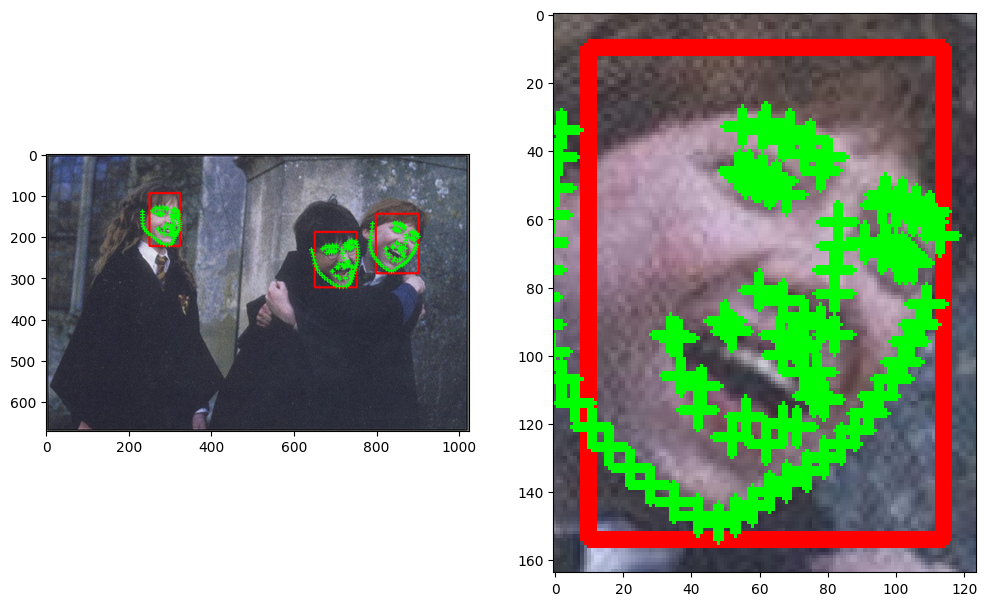

In [71]:
import matplotlib.pyplot as plt
import cv2 as cv

#np.loadtxt('WFLW_annotations/list_98pt_rect_attr_train_test/list_98pt_rect_attr_train.txt')

data = pd.read_csv(data_directory + 'WFLW_annotations/list_98pt_rect_attr_train_test/list_98pt_rect_attr_train.txt', sep=" ", header=None)
image_index = random.randint(0, 7500)
print(image_index)
image_index = 1601 # 5014 # 4284

image = (data.iloc[image_index][-1:]).values[0]

print(image)

#display(Image(filename=f'WFLW_images/51--Dresses/51_Dresses_wearingdress_51_970.jpg'))

from matplotlib import pyplot as plt
image1 = cv.imread(f'{data_directory}WFLW_images/{image}')
original = image1

image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

test = torch.rand([255,255,3])

def drawFace(image, index):
    a = data.iloc[index][196:198].values
    b = data.iloc[index][198:200].values
    image = cv.rectangle(image, a, b,(255,0,0),3)

    for i in range(0 * 2, 98 * 2, 2):
        p = data.iloc[index][i:i + 2].astype(np.int32).values
        image = cv.drawMarker(image, p, (0,255,0), markerSize = 10, thickness = 2)
    
    return image, a, b

for face in data.index[data[206] == image]:
    _, upper, lower = drawFace(image1, face)
    test = image1[upper[1]-10:lower[1]+10,upper[0]-10:lower[0]+10,:]

plt.figure()
f, axarr = plt.subplots(1,2, figsize=(12, 12)) 
axarr[0].imshow(image1)
axarr[1].imshow(test)
#axarr[2].imshow(original)

In [72]:
import torchvision
from torchvision.io import decode_image
from torchvision import transforms
from torchvision.models.detection import FasterRCNN_MobileNet_V3_Large_320_FPN_Weights
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_V2_Weights
from PIL import Image

im = cv.imread(f'{data_directory}WFLW_images/{image}')
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)

transform = transforms.Compose([
    transforms.ToTensor()
])

im = transform(im)
im = im.unsqueeze(0)
print(im.shape)

#model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_320_fpn(weights=FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT)
model = torchvision.models.detection.maskrcnn_resnet50_fpn_v2(weights=MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT)
model.eval()

# im = decode_image(torch.from_numpy(original))
# im = torch.tensor([original])

im = FasterRCNN_MobileNet_V3_Large_320_FPN_Weights.DEFAULT.transforms()(im)
# im = torch.permute(x, (2, 0, 1)).size()

predictions = model(im)[0]
print(predictions)

torch.Size([1, 3, 670, 1024])
{'boxes': tensor([[ 10.1157,  74.8827, 428.3748, 656.1841],
        [377.3637,  99.5696, 905.0289, 666.1070],
        [264.0793, 242.1215, 292.2719, 324.1085],
        [750.1429, 109.3878, 930.6849, 632.9030],
        [753.8263, 105.8352, 928.6771, 368.1782],
        [485.7127, 338.2340, 534.1378, 413.0735],
        [634.7403, 115.3732, 902.2261, 652.5748],
        [754.2758, 269.5137, 799.4081, 319.2699],
        [551.1610, 110.8289, 817.0357, 621.5306],
        [266.1073, 246.2824, 321.1853, 427.3807],
        [359.8615, 296.1167, 656.7916, 656.0333],
        [780.7374, 282.8705, 824.6846, 321.0300],
        [188.8657,  76.1537, 647.0743, 661.0651],
        [764.3411, 285.1415, 797.5941, 317.9870],
        [457.1454, 335.5663, 534.3427, 489.9381],
        [459.4949, 334.3775, 541.5571, 481.9419],
        [319.4526, 338.7739, 349.8533, 391.9453]], grad_fn=<StackBackward0>), 'labels': tensor([ 1,  1, 32,  1,  1, 62,  1, 32,  1, 32,  1, 32,  1, 32, 62,  1, 

tensor(0.9984, grad_fn=<SelectBackward0>)
tensor(1)
tensor(0.9970, grad_fn=<SelectBackward0>)
tensor(1)
tensor(0.9941, grad_fn=<SelectBackward0>)
tensor(32)
tensor(0.9260, grad_fn=<SelectBackward0>)
tensor(1)
tensor(0.7644, grad_fn=<SelectBackward0>)
tensor(1)
tensor(0.2739, grad_fn=<SelectBackward0>)
tensor(62)
tensor(0.2268, grad_fn=<SelectBackward0>)
tensor(1)
tensor(0.1557, grad_fn=<SelectBackward0>)
tensor(32)
tensor(0.1320, grad_fn=<SelectBackward0>)
tensor(1)
tensor(0.1263, grad_fn=<SelectBackward0>)
tensor(32)
tensor(0.1217, grad_fn=<SelectBackward0>)
tensor(1)
tensor(0.1206, grad_fn=<SelectBackward0>)
tensor(32)
tensor(0.0869, grad_fn=<SelectBackward0>)
tensor(1)
tensor(0.0864, grad_fn=<SelectBackward0>)
tensor(32)
tensor(0.0721, grad_fn=<SelectBackward0>)
tensor(62)
tensor(0.0703, grad_fn=<SelectBackward0>)
tensor(1)
tensor(0.0559, grad_fn=<SelectBackward0>)
tensor(32)


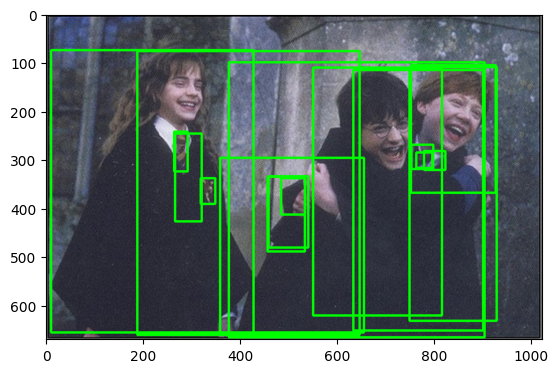

In [73]:
pred = predictions

im = original
for i in range(len(pred['boxes'])):
    a = int(pred['boxes'][i][0].item())
    b = int(pred['boxes'][i][1].item())
    c = int(pred['boxes'][i][2].item())
    d = int(pred['boxes'][i][3].item())
    # print(a,b,c,d)
    print(pred['scores'][i])
    print(pred['labels'][i])
    im = cv.rectangle(im, (a,b), (c,d), (0,255,0),3)

plt.imshow(im)

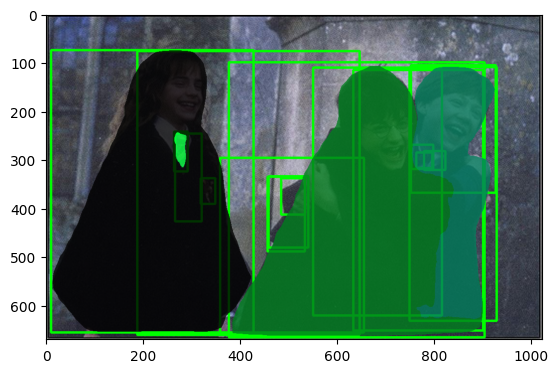

In [74]:
from torchvision import utils

score_threshold = 0.8
masks = predictions['masks'][predictions['scores'] > score_threshold]
masks = masks > 0.5
num_masks = masks.size(0)
colors = torch.randint(0, 256, (num_masks, 3), dtype=torch.uint8)

image_with_masks = torchvision.utils.draw_segmentation_masks(torch.from_numpy(im.copy()).to(torch.uint8).permute(2,0,1), masks.squeeze(1))#, colors=colors, alpha=0.5)
image_with_masks = image_with_masks.permute(1, 2, 0).numpy()
#im1 = im.permute(1,2,0).numpy()
plt.imshow(image_with_masks)
#plt.imshow(im1)